In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import os.path
from skimage.measure import block_reduce
import seaborn as sns


In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving subject02.wink.gif to subject02.wink.gif
Saving subject02.sleepy.gif to subject02.sleepy.gif
Saving subject02.rightlight.gif to subject02.rightlight.gif
Saving subject02.sad.gif to subject02.sad.gif
Saving subject02.noglasses.gif to subject02.noglasses.gif
Saving subject02.normal.gif to subject02.normal.gif
Saving subject02.leftlight.gif to subject02.leftlight.gif
Saving subject02.glasses.gif to subject02.glasses.gif
Saving subject02.happy.gif to subject02.happy.gif
Saving subject02-test.gif to subject02-test.gif
Saving subject01.wink.gif to subject01.wink.gif
Saving subject01.sleepy.gif to subject01.sleepy.gif
Saving subject01.surprised.gif to subject01.surprised.gif
Saving subject01.rightlight.gif to subject01.rightlight.gif
Saving subject01.sad.gif to subject01.sad.gif
Saving subject01.normal.gif to subject01.normal.gif
Saving subject01.leftlight.gif to subject01.leftlight.gif
Saving subject01.noglasses.gif to subject01.noglasses.gif
Saving subject01.happy.gif to subject01.ha

In [ ]:
images_string= ['subject02.wink.gif','subject02.sleepy.gif', 'subject02.rightlight.gif','subject02.sad.gif','subject02.noglasses.gif','subject02.normal.gif','subject02.leftlight.gif','subject02.glasses.gif'
,'subject02.happy.gif'
,'subject01.wink.gif'
,'subject01.sleepy.gif'
,'subject01.surprised.gif'
,'subject01.rightlight.gif'
,'subject01.sad.gif'
,'subject01.normal.gif'
,'subject01.leftlight.gif'
,'subject01.noglasses.gif'
,'subject01.happy.gif'
,'subject01.glasses.gif']

print(len(images_string))



19


In [ ]:

img_dict={}
for i,img in enumerate(images_string):
  img_dict[f'{img[:9]}_{i}'] = Image.open(img)
  # convert image to numpy array
  img_dict[f'{img[:9]}_{i}'] = asarray(img_dict[f'{img[:9]}_{i}'])
  
  # summarize shape
  print(img_dict[f'{img[:9]}_{i}'].shape)
  
print(img_dict.keys())
print(list(img_dict.values())[0])

(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
(243, 320)
dict_keys(['subject02_0', 'subject02_1', 'subject02_2', 'subject02_3', 'subject02_4', 'subject02_5', 'subject02_6', 'subject02_7', 'subject02_8', 'subject01_9', 'subject01_10', 'subject01_11', 'subject01_12', 'subject01_13', 'subject01_14', 'subject01_15', 'subject01_16', 'subject01_17', 'subject01_18'])
[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 241 241]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [ 68  68  68 ...  68  68  68]]




```
# This is formatted as code
```

This is the set of the images that we will be working on.

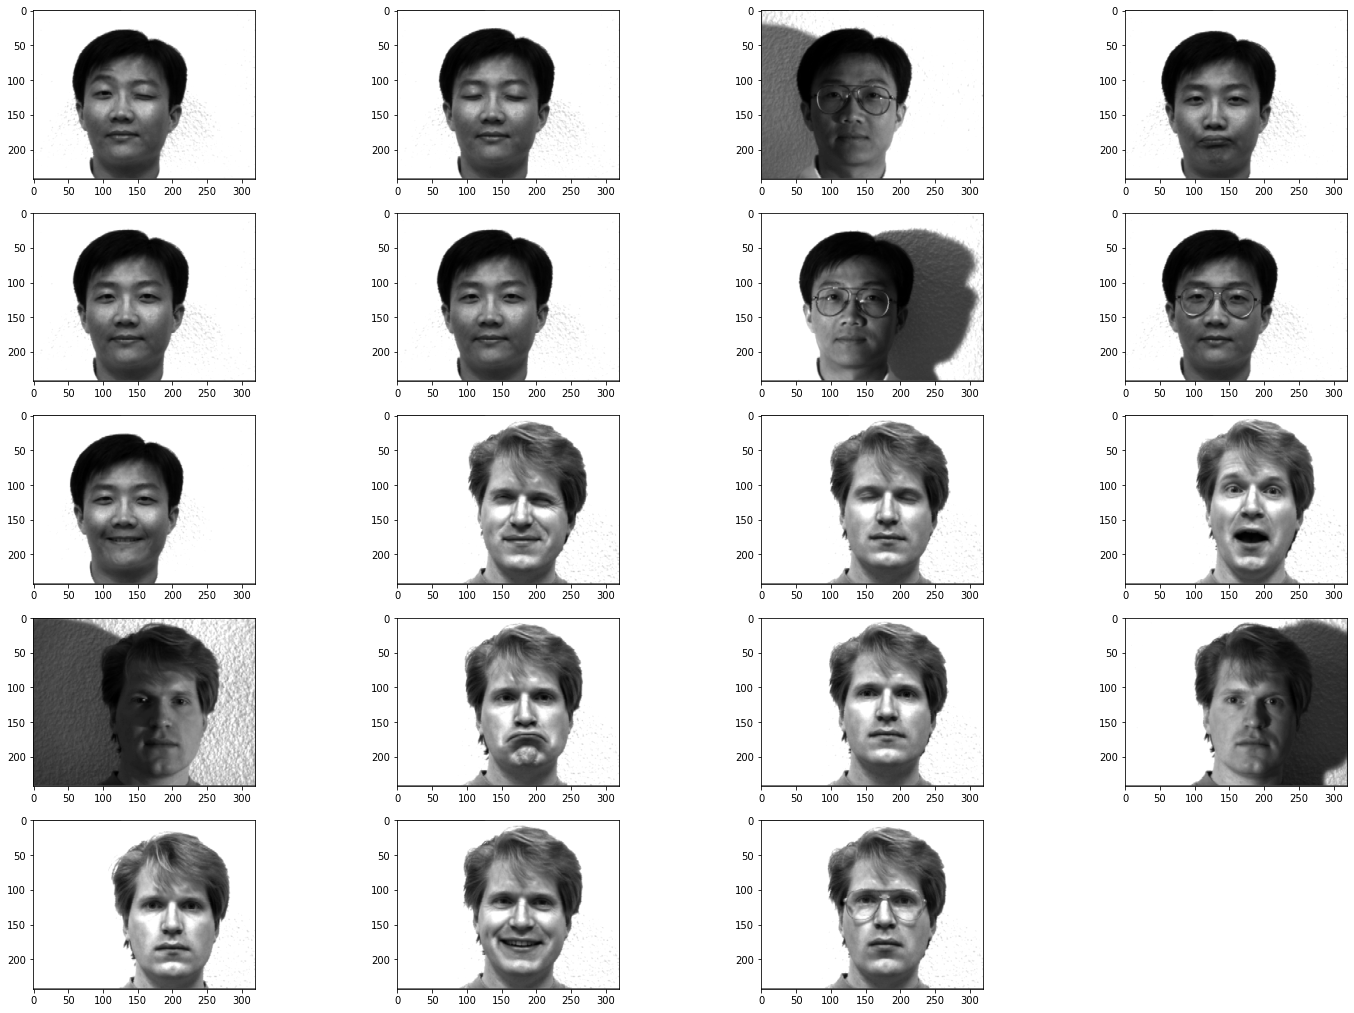

In [ ]:
figure,axis = plt.subplots(nrows=len(list(img_dict.keys()))//3,ncols=3, figsize=(25,18))
index = 0
for i in range(len(list(img_dict.keys()))):
  ax=plt.subplot(5,4,i+1)
  image = img_dict[list(img_dict.keys())[index]]
  ax.imshow(image,cmap='gray')
  ax.grid(False)
  index+=1
  
plt.show()  

**Reduce** the images by a factor of 4, reshaoe each image into a row vector and stack them together to create a matrix for each person

In [ ]:
subject1 = []
for i,sub1 in enumerate([val for val in list(img_dict.keys()) if 'subject01' in val]):
  img = block_reduce(img_dict[sub1],block_size=(4,4),func=np.mean)
  print(img.shape)
  img=img.reshape(1,-1)
  subject1.append(img)
subject_1 = np.concatenate(subject1,axis=0)
print(subject_1.shape)

subject2 = []
for i,sub2 in enumerate([val for val in list(img_dict.keys()) if 'subject02' in val]):
  img = block_reduce(img_dict[sub2],block_size=(4,4),func=np.mean)
  img=img.reshape(1,-1)
  subject2.append(img)
subject_2 = np.concatenate(subject2,axis=0)
print(subject_2.shape)




(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(61, 80)
(10, 4880)
(9, 4880)


(4880,)
(10, 4880)
(4880, 4880)


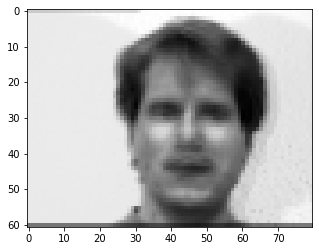

In [ ]:
#mean of subject_1
mean_sub1 = np.mean(subject_1,axis=0)
plt.imshow(mean_sub1.reshape((61, 80)),cmap='gray')
plt.grid(False)
#print(subject_1[:,:5])
print(mean_sub1.shape)

#saw the '[:,None]' reshaping of mean vector from the dmo code
var_sub1=subject_1-mean_sub1[None,:]
print(var_sub1.shape)
#saw instructions for cov matrix: https://numpy.org/doc/stable/reference/generated/numpy.cov.html
Cov_m_sub1 = np.cov(var_sub1.T)
print(Cov_m_sub1.shape)
eigenValues, eigenVectors = np.linalg.eig(Cov_m_sub1)

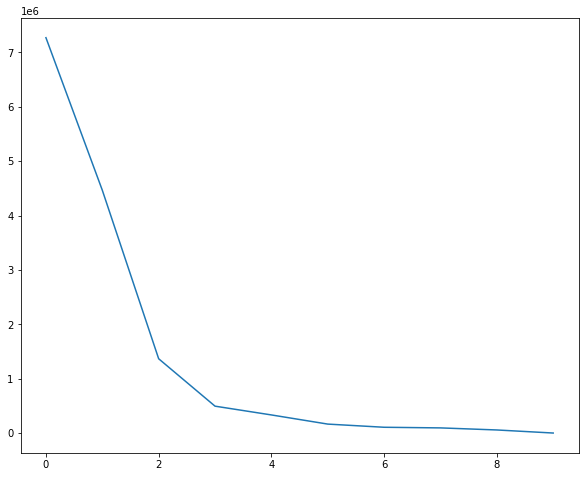

In [ ]:


#get eigen vectors with highest eigen values first
idx = np.flip(eigenValues.argsort())
eigenValues = eigenValues[idx].real
eigenVectors = eigenVectors[:,idx].real
plt.figure(figsize=(10,8))
plt.plot(eigenValues[:10])

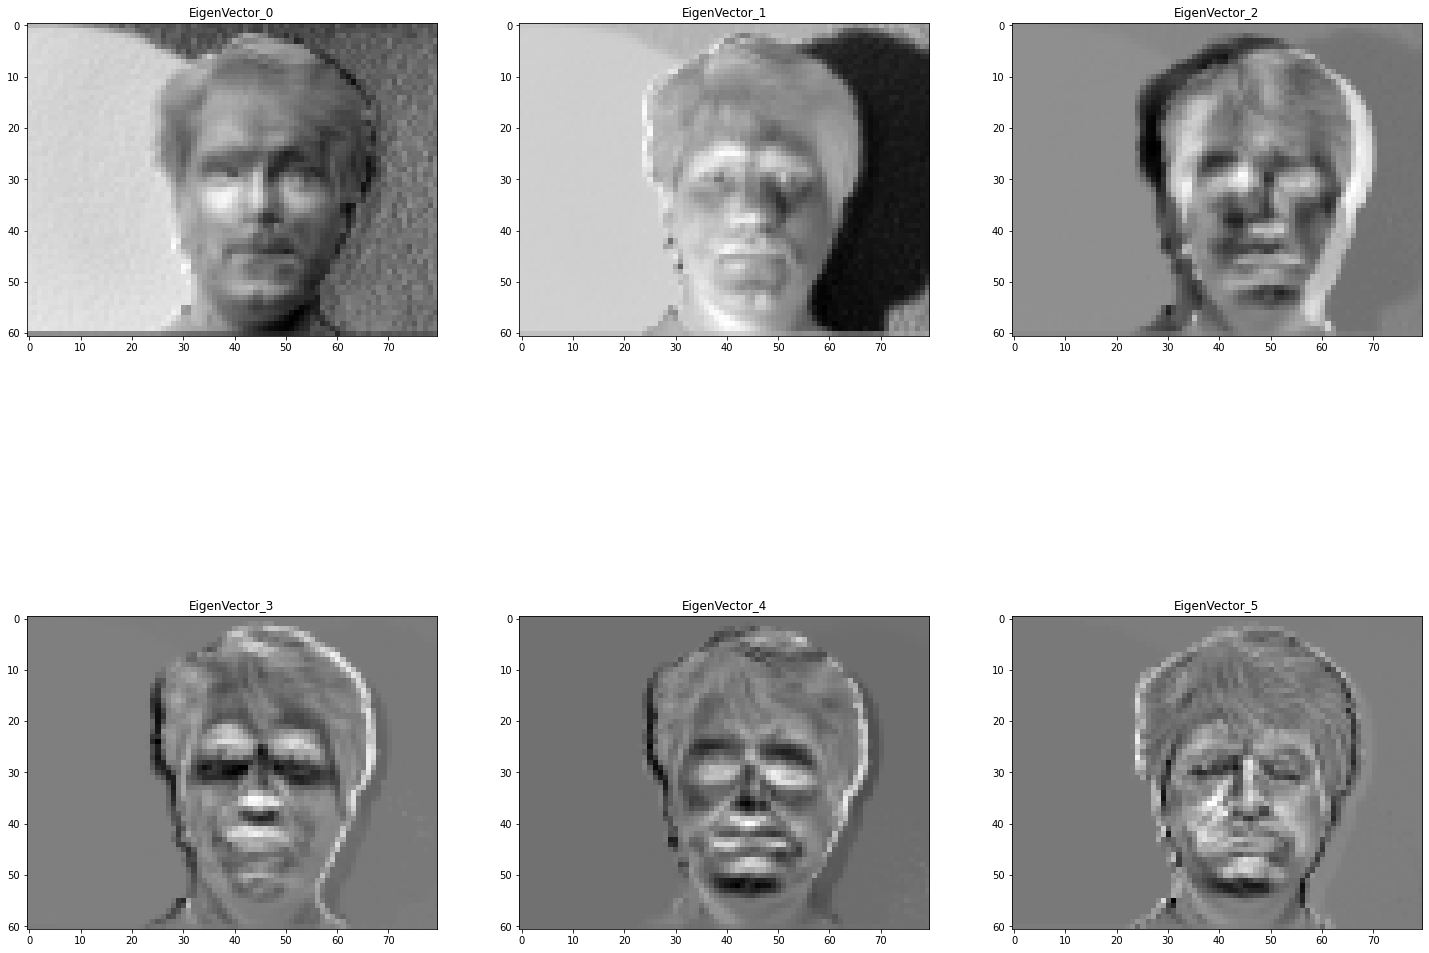

In [ ]:
figure,axis=plt.subplots(nrows=3,ncols=3,figsize=(25,20))
for i in range(6):
  ax = plt.subplot(2,3,i+1)
  first_eigen_face = eigenVectors[:,i]*-1
  ax.imshow(first_eigen_face.reshape((61, 80)),cmap='gray')
  ax.set_title(f'EigenVector_{i}')
  ax.grid(False)




Face Recognition Score

In [ ]:
test_sub1 = Image.open('subject01-test.gif')
  # convert image to numpy array
test_sub1 = asarray(test_sub1)
test_sub1 = block_reduce(test_sub1,block_size=(4,4),func=np.mean)

test_sub1=test_sub1.reshape(-1,1)
eigen_face_sub1 = (eigenVectors[:,0].reshape(-1,1))*-1
eigen_face_sub1_2 = (eigenVectors[:,1].reshape(-1,1))*-1
s_1_1 = np.dot(eigen_face_sub1.T,test_sub1)/np.dot(np.linalg.norm(eigen_face_sub1),np.linalg.norm(test_sub1))
s_1_2 = np.dot(eigen_face_sub1_2.T,test_sub1)/np.dot(np.linalg.norm(eigen_face_sub1_2),np.linalg.norm(test_sub1))
print(s_1_1)
print(s_1_2)

[[0.87740349]]
[[-0.29498973]]


Subject 2

(4880,)
(9, 4880)
(4880, 4880)


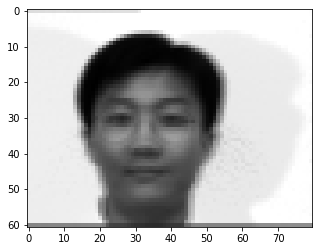

In [ ]:
#mean of subject_1
mean_sub2 = np.mean(subject_2,axis=0)
plt.imshow(mean_sub2.reshape((61, 80)),cmap='gray')
plt.grid(False)
#print(subject_1[:,:5])
print(mean_sub2.shape)

var_sub2=subject_2-mean_sub2[None,:]
print(var_sub2.shape)
#saw instructions for cov matrix: https://numpy.org/doc/stable/reference/generated/numpy.cov.html
Cov_m_sub2 = np.cov(var_sub2.T)
print(Cov_m_sub2.shape)

eigenValues, eigenVectors = np.linalg.eig(Cov_m_sub2)



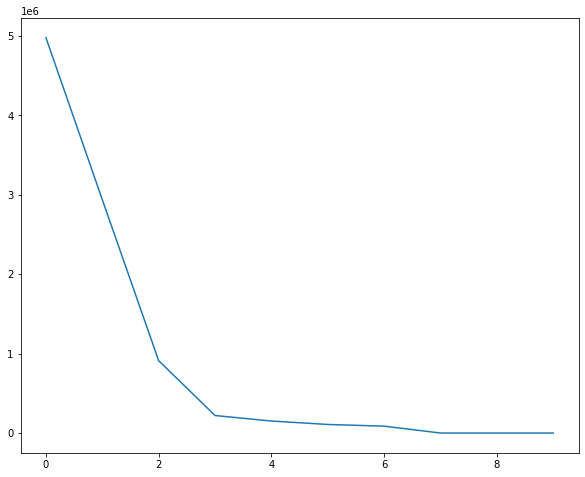

In [ ]:
#get eigen vectors with highest eigen values first
idx = np.flip(eigenValues.argsort())
eigenValues = eigenValues[idx].real
eigenVectors = eigenVectors[:,idx].real
plt.figure(figsize=(10,8))
plt.plot(eigenValues[:10])

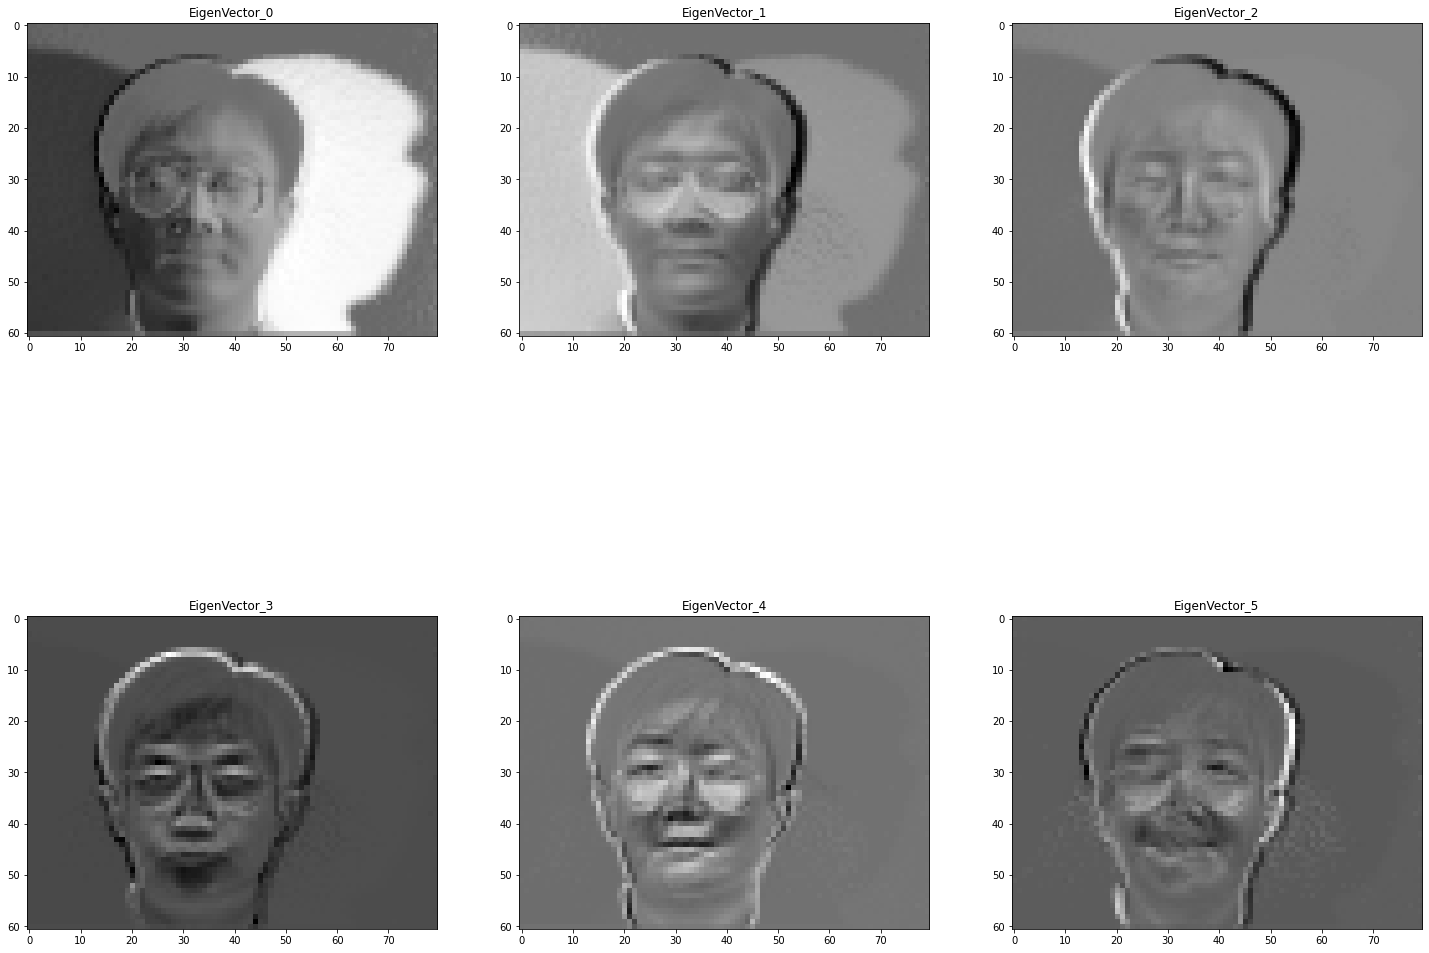

In [ ]:
figure,axis=plt.subplots(nrows=3,ncols=3,figsize=(25,20))
for i in range(6):
  ax = plt.subplot(2,3,i+1)
  first_eigen_face = eigenVectors[:,i]*-1
  ax.imshow(first_eigen_face.reshape((61, 80)),cmap='gray')
  ax.set_title(f'EigenVector_{i}')
  ax.grid(False)

In [ ]:
test_sub2 = Image.open('subject02-test.gif')
  # convert image to numpy array
test_sub2 = asarray(test_sub2)
test_sub2 = block_reduce(test_sub2,block_size=(4,4),func=np.mean)

test_sub2=test_sub2.reshape(-1,1)
eigen_face_sub2 = (eigenVectors[:,0].reshape(-1,1))*-1
s_2_1 = np.dot(eigen_face_sub2.T,test_sub2)/np.dot(np.linalg.norm(eigen_face_sub2),np.linalg.norm(test_sub2))
eigen_face_sub2_2 = (eigenVectors[:,1].reshape(-1,1))*-1
s_2_2 = np.dot(eigen_face_sub2_2.T,test_sub2)/np.dot(np.linalg.norm(eigen_face_sub2_2),np.linalg.norm(test_sub2))
print(s_2_1)
print(s_2_2)

[[0.41782208]]
[[0.63218378]]
